In [62]:
import numpy as np
from openqaoa.problems import BinPacking, MaximumCut
import json
import pprint
import networkx as nx

In [63]:
desiredProblemType = 'MaxCut' #options: 'BinPacking', 'MaxCut'

In [64]:
if desiredProblemType == 'BinPacking':
    n_items = 2 # number of items
    n_bins = 2 # maximum number of bins the solution will be explored on
    min_weight = 1 # minimum weight of the items
    max_weight = 3 # maximum weight of the items
    weight_capacity = 5 # weight capacity of the bins
    weights = np.random.default_rng(seed=1234).integers(low=min_weight, high=max_weight, size=n_items) # random instance of the problem

    bpp = BinPacking(weights, weight_capacity, n_bins=n_bins, simplifications=False)
    quboProb = bpp.qubo

elif desiredProblemType == 'MaxCut':
    G = nx.generators.fast_gnp_random_graph(n=10, p=0.6, seed=42)
    maxcut_prob = MaximumCut(G)
    quboProb = maxcut_prob.qubo

quboProb.hamiltonian.expression

0 + 1.0Z_{0}Z_{2} + 1.0Z_{0}Z_{3} + 1.0Z_{0}Z_{4} + 1.0Z_{0}Z_{6} + 1.0Z_{0}Z_{7} + 1.0Z_{0}Z_{8} + 1.0Z_{0}Z_{9} + 1.0Z_{1}Z_{2} + 1.0Z_{1}Z_{3} + 1.0Z_{1}Z_{5} + 1.0Z_{1}Z_{6} + 1.0Z_{1}Z_{7} + 1.0Z_{1}Z_{9} + 1.0Z_{2}Z_{4} + 1.0Z_{2}Z_{5} + 1.0Z_{2}Z_{6} + 1.0Z_{2}Z_{7} + 1.0Z_{2}Z_{8} + 1.0Z_{2}Z_{9} + 1.0Z_{3}Z_{5} + 1.0Z_{3}Z_{6} + 1.0Z_{3}Z_{8} + 1.0Z_{3}Z_{9} + 1.0Z_{4}Z_{5} + 1.0Z_{4}Z_{7} + 1.0Z_{4}Z_{8} + 1.0Z_{5}Z_{6} + 1.0Z_{5}Z_{7} + 1.0Z_{6}Z_{9} + 1.0Z_{8}Z_{9}

In [65]:
qubo_dict = quboProb.asdict()
data_to_save = {
    "terms": qubo_dict["terms"],
    "weights": qubo_dict["weights"],
    "constant": qubo_dict.get("constant", 0.0),
    "problem_type": qubo_dict.get("problem_instance", {}).get("problem_type", "unknown")
}

file_path = "qubo_data.json"
with open(file_path, "w") as f:
    json.dump(data_to_save, f)

print(f"QUBO data saved to {file_path}")
print("Saved data structure example:")
#print(json.dumps(data_to_save, indent=2))
print(quboProb.asdict()) # Original full dictionary from OpenQAOA

QUBO data saved to qubo_data.json
Saved data structure example:
{'terms': [[0, 2], [0, 3], [0, 4], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 5], [1, 6], [1, 7], [1, 9], [2, 4], [2, 5], [2, 6], [2, 7], [8, 2], [9, 2], [3, 5], [3, 6], [8, 3], [9, 3], [4, 5], [4, 7], [8, 4], [5, 6], [5, 7], [9, 6], [8, 9]], 'weights': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'constant': 0, 'n': 10, 'problem_instance': {'problem_type': 'maximum_cut', 'G': {'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}, {'id': 7}, {'id': 8}, {'id': 9}], 'links': [{'source': 0, 'target': 2}, {'source': 0, 'target': 3}, {'source': 0, 'target': 4}, {'source': 0, 'target': 6}, {'source': 0, 'target': 7}, {'source': 0, 'target': 8}, {'source': 0, 'target': 9}, {'source': 1, 'target': 2}, {'source': 1, 'target': 3}, {'s

In [66]:
#exact solver for later comparison to qunatum results
hamiltonian = quboProb.hamiltonian
# import the brute-force solver to obtain exact solution
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

Ground State energy: -10.0, Solution: ['1111100000', '0011101100', '1100010010', '1110010010', '1100011010', '0011001110', '1100110001', '0011100101', '0001101101', '0011101101', '1100010011', '0000011111']


(<Figure size 1000x600 with 1 Axes>, <Axes: >)

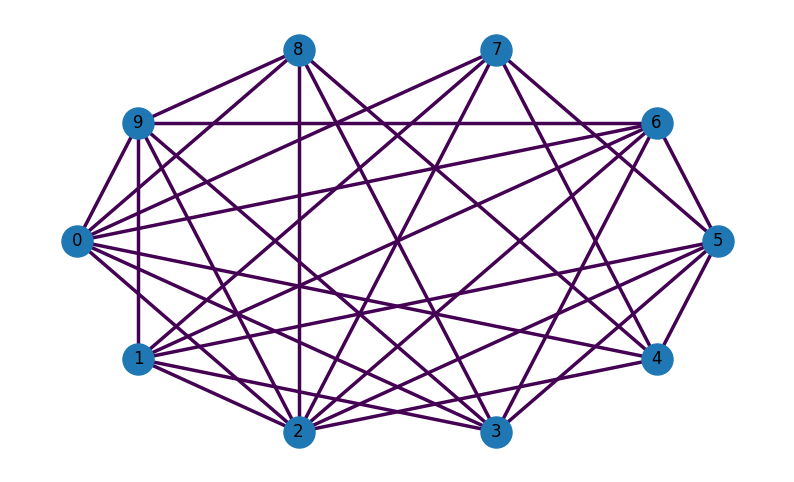

In [67]:
#bpp.classical_solution #something here about finding the solution classically can explore 
from openqaoa.utilities import plot_graph
plot_graph(G)